In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Папка с результатами
folder_path = "reports/strategies"

# Чтение всех файлов
strategies = {}
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        strategy_name = file.replace(".csv", "")
        df = pd.read_csv(os.path.join(folder_path, file), index_col=0).T
        df.index = [strategy_name]
        strategies[strategy_name] = df

# Объединяем все стратегии в один DataFrame
all_strategies = pd.concat(strategies.values())
all_strategies = all_strategies.apply(pd.to_numeric, errors='ignore')

# Преобразуем даты
all_strategies["Start"] = pd.to_datetime(all_strategies["Start"])
all_strategies["End"] = pd.to_datetime(all_strategies["End"])
all_strategies["Period (days)"] = all_strategies["Period"].apply(lambda x: pd.to_timedelta(x).days)

# Выбираем ключевые метрики для сравнения
metrics = [
    "Total Return [%]",
    "Average Annual Return [%]",
    "Max Drawdown [%]",
    "Sharpe Ratio",
    "Sortino Ratio",
    "Calmar Ratio",
    "Profit Factor",
    "Win Rate [%]",
    "Total Trades",
    "Avg Winning Trade [%]",
    "Avg Losing Trade [%]",
    "Volatility [%]",
    "Omega Ratio",
    "CVaR 5%",
]




/var/folders/lh/9k36l4vn35v4qnj9z669pmtc0000gn/T/ipykernel_32643/892048328.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  all_strategies = all_strategies.apply(pd.to_numeric, errors='ignore')


In [8]:
# Топ-3 стратегий по Total Return
top3 = all_strategies.sort_values("Total Return [%]", ascending=False).head(3)
print("TOP-3 стратегий по Total Return [%]:")
top3[metrics]



TOP-3 стратегий по Total Return [%]:


Metric,Total Return [%],Average Annual Return [%],Max Drawdown [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Profit Factor,Win Rate [%],Total Trades,Avg Winning Trade [%],Avg Losing Trade [%],Volatility [%],Omega Ratio,CVaR 5%
LGBM_Classifier,80.319286,10.589531,39.352726,0.673615,0.280518,0.390039,11.683149,80.641026,804,54.206382,-13.034079,1.392181,1.262221,-0.034463
MLP_Classifier,73.734147,10.662809,37.122237,0.646221,0.265986,0.385602,36.371517,82.317073,518,72.400825,-11.157152,1.370000,1.248768,-0.033902
Ensemble_Classifier,59.626703,8.667838,40.319233,0.562288,0.247283,0.297463,13.793164,78.585462,530,64.095235,-14.801761,1.389764,1.210273,-0.034845


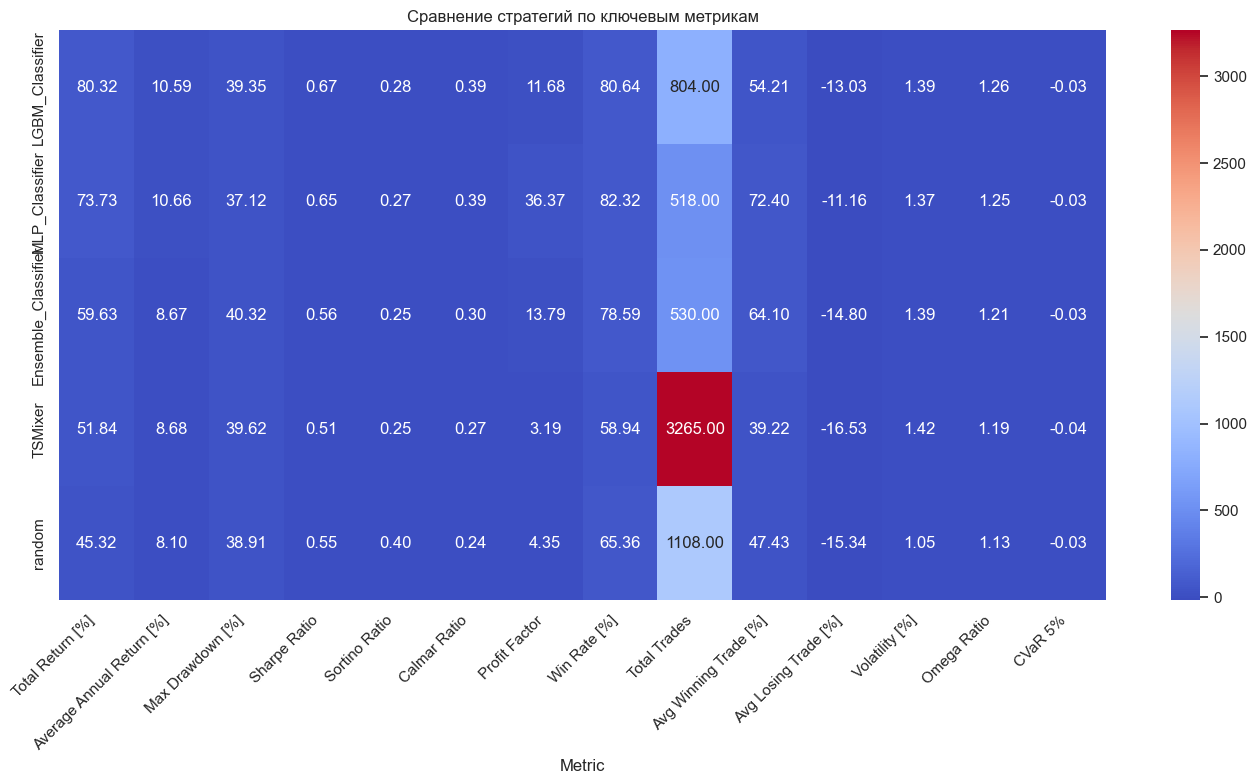

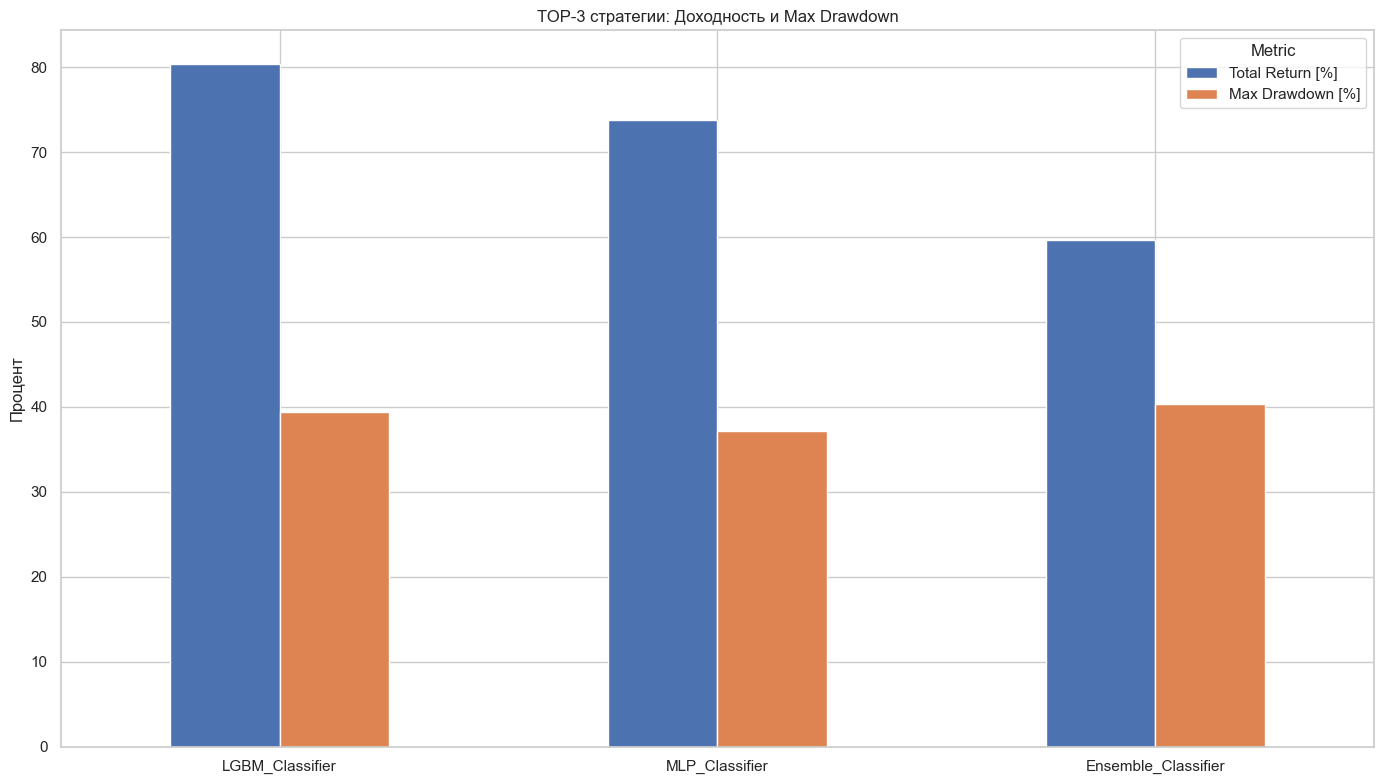

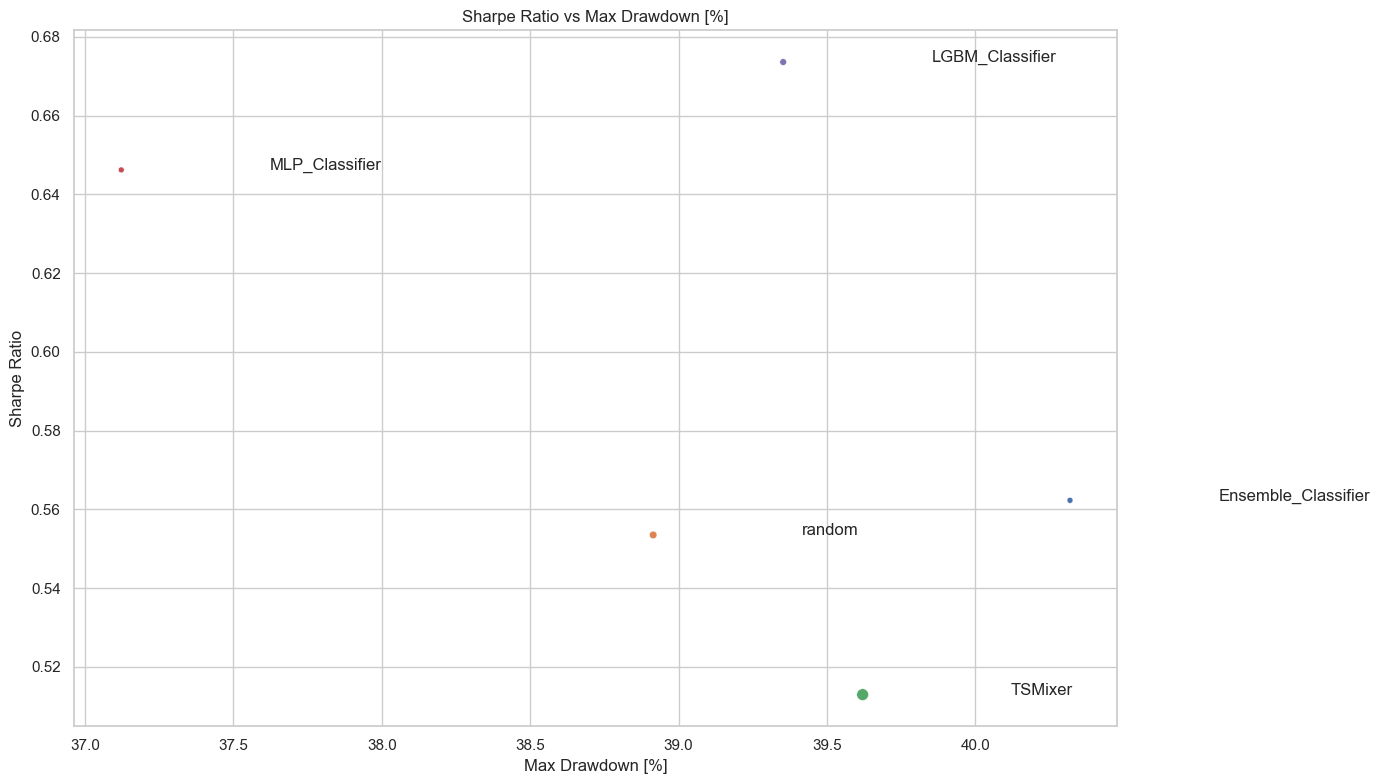

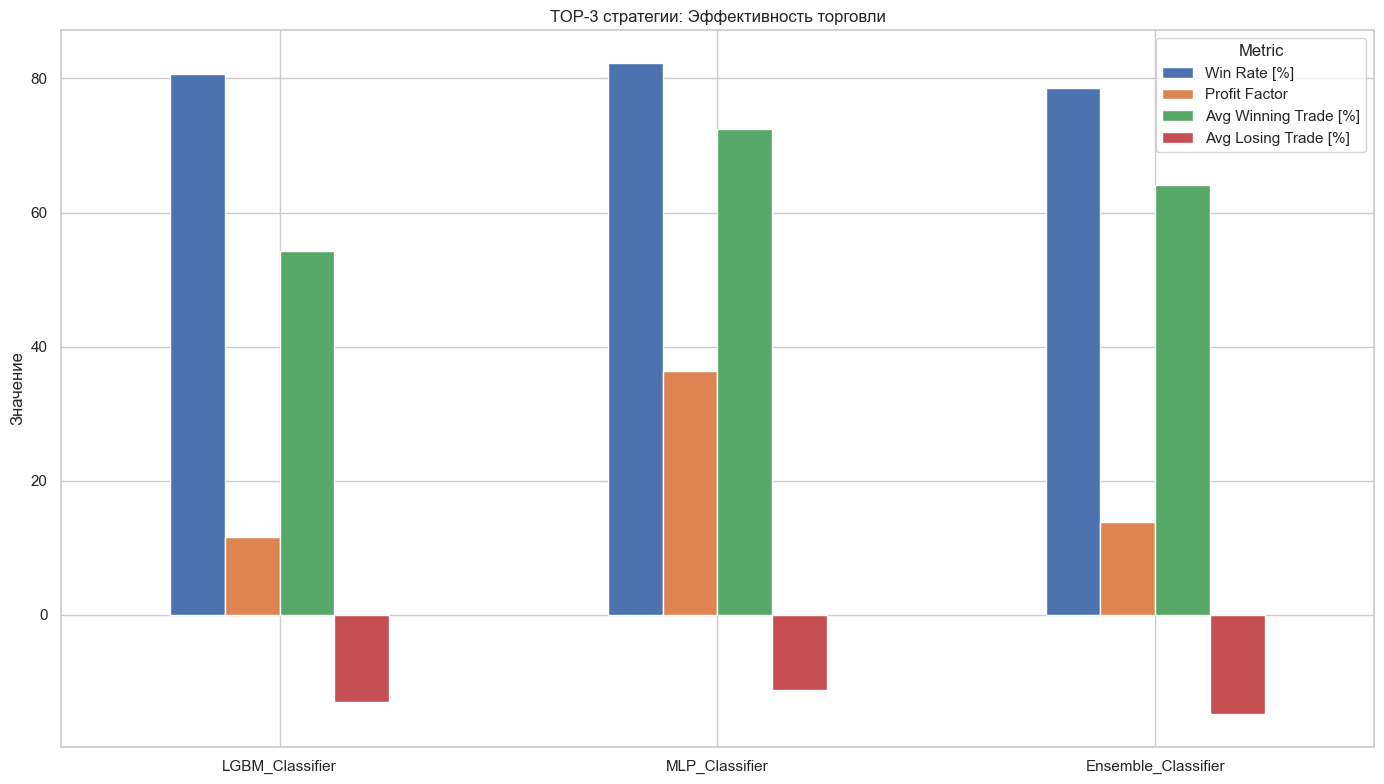

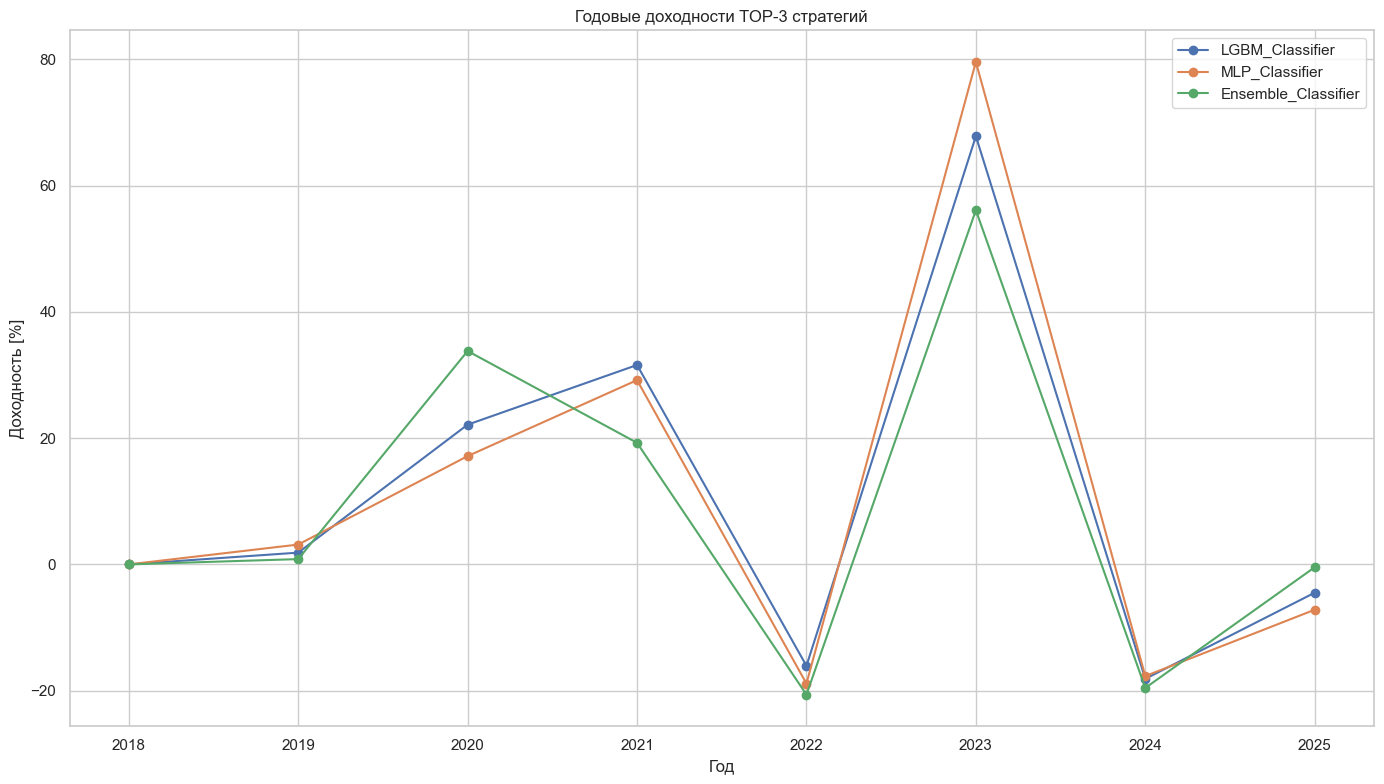

In [9]:
# ----------------- Визуализация -----------------

sns.set(style="whitegrid")

# 1. Heatmap всех стратегий по ключевым метрикам
plt.figure(figsize=(14,8))
sns.heatmap(all_strategies[metrics].sort_values("Total Return [%]", ascending=False),
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Сравнение стратегий по ключевым метрикам")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Барплот TOP-3 стратегий по Total Return и Max Drawdown
top3_plot = top3[["Total Return [%]", "Max Drawdown [%]"]]
top3_plot.plot(kind='bar', figsize=(14,8))
plt.title("TOP-3 стратегии: Доходность и Max Drawdown")
plt.ylabel("Процент")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Scatter: Sharpe Ratio vs Max Drawdown для всех стратегий
plt.figure(figsize=(14,8))
sns.scatterplot(data=all_strategies, x="Max Drawdown [%]", y="Sharpe Ratio",
                size="Total Trades", hue=all_strategies.index, legend=False, s=100)
for i, row in all_strategies.iterrows():
    plt.text(row["Max Drawdown [%]"]+0.5, row["Sharpe Ratio"], i)
plt.title("Sharpe Ratio vs Max Drawdown [%]")
plt.xlabel("Max Drawdown [%]")
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.show()

# 4. Barplot по Win Rate, Profit Factor и Avg Winning/Losing Trade для топ-3
top3_metrics = top3[["Win Rate [%]", "Profit Factor", "Avg Winning Trade [%]", "Avg Losing Trade [%]"]]
top3_metrics.plot(kind='bar', figsize=(14,8))
plt.title("TOP-3 стратегии: Эффективность торговли")
plt.ylabel("Значение")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Годовые доходности для топ-3 стратегий
years = [str(y) for y in range(2018, 2026)]
plt.figure(figsize=(14,8))
for strategy in top3.index:
    returns = top3.loc[strategy, [f"Return {y} [%]" for y in range(2018, 2026)]].values
    plt.plot(years, returns, marker='o', label=strategy)
plt.title("Годовые доходности TOP-3 стратегий")
plt.xlabel("Год")
plt.ylabel("Доходность [%]")
plt.legend()
plt.tight_layout()
plt.show()